# PROTOTYPE
### Pulling financial data based on a ticker defined by user

#### First run the imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import os
import time

#### Run this cell too please :D

These cells define the functions to pull financial data. You may need to create folders called "Income" and "BalanceSheet" in your directory

In [14]:
def income_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
    response = requests.get(url)
    with open(os.path.join("Income", f"{ticker}_inc.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./Income/{ticker}_inc.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

# this function pulls Balance Sheet data from StockRow.com
def balance_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=Q&section=Balance%20Sheet&sort=desc'
    response = requests.get(url)
    with open(os.path.join("BalanceSheet", f"{ticker}_balance.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./BalanceSheet/{ticker}_balance.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

# this function pulls Cash Flow statement data from StockRow.com
def cashflow_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Cash%20Flow&sort=desc'
    response = requests.get(url)
    with open(os.path.join("CashFlow", f"{ticker}_cashflow.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./CashFlow/{ticker}_cashflow.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

In [15]:
stock_list = pd.read_csv('list_of_stocks.csv')

In [16]:
# this function prompts the user for a ticker input
# and calls the income_puller() function to return a DataFrame
# same for balance_puller() to return Balance Sheet info
def ticker_input():
    ticker = input('Please enter a ticker').upper()
    income_df = income_puller(ticker.upper())
    balance_df = balance_puller(ticker.upper())
    cashflow_df = cashflow_puller(ticker.upper())
    return income_df, balance_df, cashflow_df, ticker

#### Please run this cell and enter a ticker; let's see if it works!

In [17]:
# call the function and print charts
income_df,balance_df, cashflow_df, ticker = ticker_input()
print(f"Financial data for {ticker.upper()} below:")

Please enter a ticker SWKS


Financial data for SWKS below:


#### If no errors, then run this cell to see Income Statement data

In [18]:
def income_statement_chart_maker(income_df):
    # plot the charts I like most
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=income_df,x=income_df.index,y='Revenue',color='green')
    sns.scatterplot(data=income_df,x=income_df.index,y='Gross Profit',color='red')
    sns.scatterplot(data=income_df,x=income_df.index,y='EBITDA')
    sns.scatterplot(data=income_df,x=income_df.index,y='Net Income Common')
    plt.legend(labels=['Revenue','Gross Profit','EBITDA','Net Income'],bbox_to_anchor=(1,1));
    plt.ylabel('income statement money')
    # this code is optional, 
    # it may bounce errors if the ticker isn't in stocks_list 
    # try big familiar tickers like JNJ or INTC to calibrate 
    ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
    plt.title(f'TTM Income Statement data for {ticker_name[5:]}');


#### Run this cell to see Balance Sheet data

In [19]:
def balance_sheet_chart_maker(balance_df):
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=balance_df,x=balance_df.index,y="Total Assets", color='blue')
    sns.scatterplot(data=balance_df,x=balance_df.index,y="Cash and Short Term Investments", color='green')
    sns.scatterplot(data=balance_df,x=balance_df.index,y="Total current assets", color='goldenrod')
    sns.scatterplot(data=balance_df,x=balance_df.index,y="Total liabilities",color='red')
    sns.scatterplot(data=balance_df,x=balance_df.index,y="Total current liabilities", color='crimson')
    plt.legend(labels=['Total Assets','Cash & Equivalents','Current Assets','Total Liabilities','Current Liabilities'],bbox_to_anchor=(1,1));
    plt.ylabel('balance sheet money')
    # this code is optional, 
    # it may bounce errors if the ticker isn't in stocks_list 
    # try big familiar tickers like JNJ or INTC to calibrate 
    ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
    plt.title(f'TTM Balance Sheet data for {ticker_name[5:]}');

#### Run this cell to see Cash Flow Statement data

In [20]:
def cash_flow_chart_maker(cashflow_df):
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y="Operating Cash Flow", color='blue')
    sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y=-cashflow_df["Capital expenditures"], color='red')
    sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y=cashflow_df["Operating Cash Flow"]+cashflow_df["Capital expenditures"], color='green')
    sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y=-cashflow_df["Dividends Paid (Total)"], color='goldenrod')
    plt.legend(labels=['Operating Cash Flow','CapEx','FCF (est)','Dividends'],bbox_to_anchor=(1,1));
    plt.ylabel('cash flow money')
    # this code is optional, 
    # it may bounce errors if the ticker isn't in stocks_list 
    # try big familiar tickers like JNJ or INTC to calibrate 
    ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
    plt.title(f'TTM Cash Flow data for {ticker_name[5:]}');


# Charts

In [21]:
# call the function and print charts
income_df,balance_df, cashflow_df, ticker = ticker_input()
print(f"Financial data for {ticker.upper()} below:")

Please enter a ticker SWKS


Financial data for SWKS below:


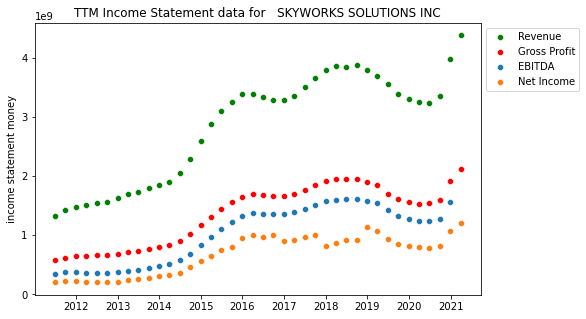

In [22]:
income_statement_chart_maker(income_df)

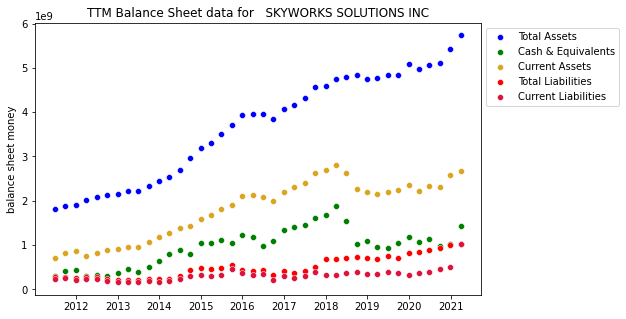

In [23]:
balance_sheet_chart_maker(balance_df)

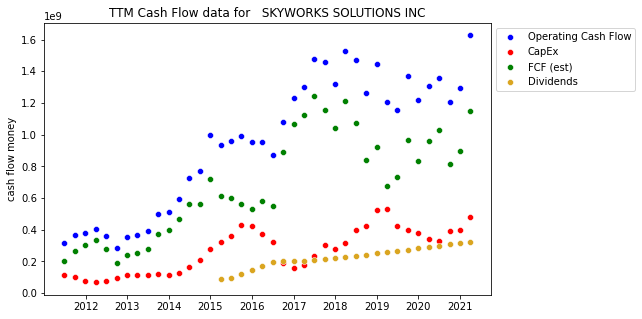

In [24]:
cash_flow_chart_maker(cashflow_df)

In [ ]:
#All in one cell

# Bokeh test

In [25]:
from bokeh.plotting import figure, show

In [119]:
# prep some data
x = income_df.index

y1 = income_df['Revenue']
y2 = income_df['Net Income Common']
y3 = balance_df['Total Assets']
y4 = balance_df['Total current liabilities']

p = figure(title='Example', x_axis_label='x',y_axis_label='y')

p.circle(x,y1,line_color='green',size=12,fill_alpha=0.25)
p.circle(x,y2,size=12,fill_alpha=0.25)
p.circle(x,y3,color='black',size=12,fill_alpha=0.25)
p.circle(x,y4,color='red',size=12,fill_alpha=0.25)

GlyphRenderer(id='6498', ...)

In [129]:
# prep some data
x = income_df.index

y1 = balance_df['Cash and Short Term Investments']
y2 = balance_df['Shareholders Equity (Tangible)']
y3 = balance_df['Total Assets']
y4 = balance_df['Total liabilities']
y5 = balance_df['Total current assets']

p = figure(title='Example', x_axis_label='x',y_axis_label='y')

p.circle(x,y1,line_color='green',size=12,fill_alpha=0.25)
p.circle(x,y2,color='blue',size=12,fill_alpha=0.25)
p.circle(x,y3,color='black',size=12,fill_alpha=0.25)
p.circle(x,y4,color='red',size=12,fill_alpha=0.25)
p.circle(x,y5,color='gold',size=12,fill_alpha=0.25)

GlyphRenderer(id='7533', ...)

In [130]:
show(p)